In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
fifa = pd.read_csv('./players_22.csv')

C:\Users\herna\AppData\Local\Temp\ipykernel_16100\2231276672.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('./players_22.csv')


In [3]:
fifa

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
columnas_a_eliminar = ["player_face_url", "club_logo_url", "club_flag_url", "nation_logo_url","pace","mentality_aggression","mentality_composure","mentality_vision","mentality_penalties","mentality_positioning","mentality_interceptions", "player_positions","weight_kg","height_cm","nation_flag_url", "league_level","sofifa_id","body_type", "player_url", "short_name", "dob", "real_face", "club_jersey_number", "nation_jersey_number", "preferred_foot","release_clause_eur", "weak_foot","club_loaned_from", "club_joined", "long_name", "league_name", "club_team_id", "club_name", "club_position", "nation_team_id", "nation_position", "nationality_id", "nationality_name", "club_contract_valid_until", "player_tags", "player_traits", "work_rate", 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
    'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
    'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed']
fifa_limpio = fifa.drop(columnas_a_eliminar, axis=1)

In [5]:
fifa_limpio.head()

,overall,potential,value_eur,wage_eur,age,skill_moves,international_reputation,shooting,passing,dribbling,defending,physic,movement_reactions
0,93,93,78000000.0,320000.0,34,4,5,92.0,91.0,95.0,34.0,65.0,94
1,92,92,119500000.0,270000.0,32,4,5,92.0,79.0,86.0,44.0,82.0,93
2,91,91,45000000.0,270000.0,36,5,5,94.0,80.0,88.0,34.0,75.0,94
3,91,91,129000000.0,270000.0,29,5,5,83.0,86.0,94.0,37.0,63.0,89
4,91,91,125500000.0,350000.0,30,4,4,86.0,93.0,88.0,64.0,78.0,91


In [6]:
fifa_limpio

,overall,potential,value_eur,wage_eur,age,skill_moves,international_reputation,shooting,passing,dribbling,defending,physic,movement_reactions
0,93,93,78000000.0,320000.0,34,4,5,92.0,91.0,95.0,34.0,65.0,94
1,92,92,119500000.0,270000.0,32,4,5,92.0,79.0,86.0,44.0,82.0,93
2,91,91,45000000.0,270000.0,36,5,5,94.0,80.0,88.0,34.0,75.0,94
3,91,91,129000000.0,270000.0,29,5,5,83.0,86.0,94.0,37.0,63.0,89
4,91,91,125500000.0,350000.0,30,4,4,86.0,93.0,88.0,64.0,78.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,2,1,35.0,46.0,48.0,42.0,49.0,53
19235,47,59,110000.0,500.0,19,2,1,39.0,50.0,46.0,41.0,51.0,49
19236,47,55,100000.0,500.0,21,2,1,37.0,45.0,49.0,41.0,52.0,46
19237,47,60,110000.0,500.0,19,2,1,46.0,36.0,48.0,15.0,42.0,48


In [7]:
fifa_limpio_no_null = fifa_limpio.dropna()

missing_values_after_drop = fifa_limpio_no_null.isnull().sum()
print(missing_values_after_drop[missing_values_after_drop > 0])

Series([], dtype: int64)


In [8]:
fifa_limpio_no_null

,overall,potential,value_eur,wage_eur,age,skill_moves,international_reputation,shooting,passing,dribbling,defending,physic,movement_reactions
0,93,93,78000000.0,320000.0,34,4,5,92.0,91.0,95.0,34.0,65.0,94
1,92,92,119500000.0,270000.0,32,4,5,92.0,79.0,86.0,44.0,82.0,93
2,91,91,45000000.0,270000.0,36,5,5,94.0,80.0,88.0,34.0,75.0,94
3,91,91,129000000.0,270000.0,29,5,5,83.0,86.0,94.0,37.0,63.0,89
4,91,91,125500000.0,350000.0,30,4,4,86.0,93.0,88.0,64.0,78.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,2,1,35.0,46.0,48.0,42.0,49.0,53
19235,47,59,110000.0,500.0,19,2,1,39.0,50.0,46.0,41.0,51.0,49
19236,47,55,100000.0,500.0,21,2,1,37.0,45.0,49.0,41.0,52.0,46
19237,47,60,110000.0,500.0,19,2,1,46.0,36.0,48.0,15.0,42.0,48


In [9]:
features = fifa_limpio_no_null.drop('value_eur', axis=1)
target = fifa_limpio_no_null['value_eur']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
correlation_matrix = fifa_limpio_no_null.corr()

target_correlation = correlation_matrix['value_eur'].sort_values(ascending=False)

In [12]:
threshold = -0.5

significant_features = target_correlation[(target_correlation > threshold) | (target_correlation < -threshold)]
print(significant_features)

value_eur                   1.000000
wage_eur                    0.824991
international_reputation    0.638574
overall                     0.564330
potential                   0.531120
movement_reactions          0.509978
dribbling                   0.404812
passing                     0.404774
skill_moves                 0.308249
shooting                    0.290294
physic                      0.215105
defending                   0.147359
age                         0.047941
Name: value_eur, dtype: float64


In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)
print("Coeficiente de determinación R²:", score)

Coeficiente de determinación R²: 0.7246110339383227


In [14]:
print("Coeficientes del modelo:")
for feature, coef in zip(features.columns, model.coef_):
    print(f"{feature}: {coef}")

Coeficientes del modelo:
overall: 1652660.7362407602
potential: -378323.0736821989
wage_eur: 4749404.492328545
age: -1685530.6494709565
skill_moves: 25543.083188853605
international_reputation: 1258438.621477793
shooting: -161198.41783529066
passing: 126699.83628891053
dribbling: -146839.6798477504
defending: -275998.6903592772
physic: 159495.96820937176
movement_reactions: 249410.5617316324


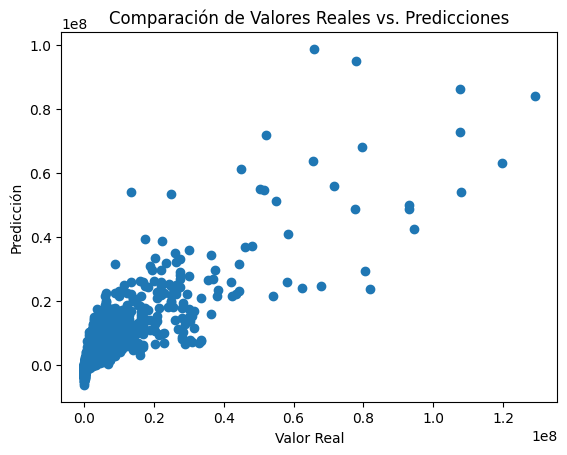

In [15]:
plt.scatter(y_test, predictions)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train_scaled, y_train)

predictions = decision_tree.predict(X_test_scaled)

score = decision_tree.score(X_test_scaled, y_test)
print("Coeficiente de determinación R²:", score)

Coeficiente de determinación R²: 0.9110016891056376


In [17]:
importancias_caracteristicas = decision_tree.feature_importances_

nombres_caracteristicas = X_train.columns

importancias_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancias_caracteristicas})
importancias_df = importancias_df.sort_values('Importancia', ascending=False)

print(importancias_df)

              Característica  Importancia
0                    overall     0.714561
1                  potential     0.241011
3                        age     0.027595
9                  defending     0.006560
7                    passing     0.004637
8                  dribbling     0.002350
6                   shooting     0.001661
2                   wage_eur     0.000683
11        movement_reactions     0.000480
10                    physic     0.000393
5   international_reputation     0.000039
4                skill_moves     0.000031


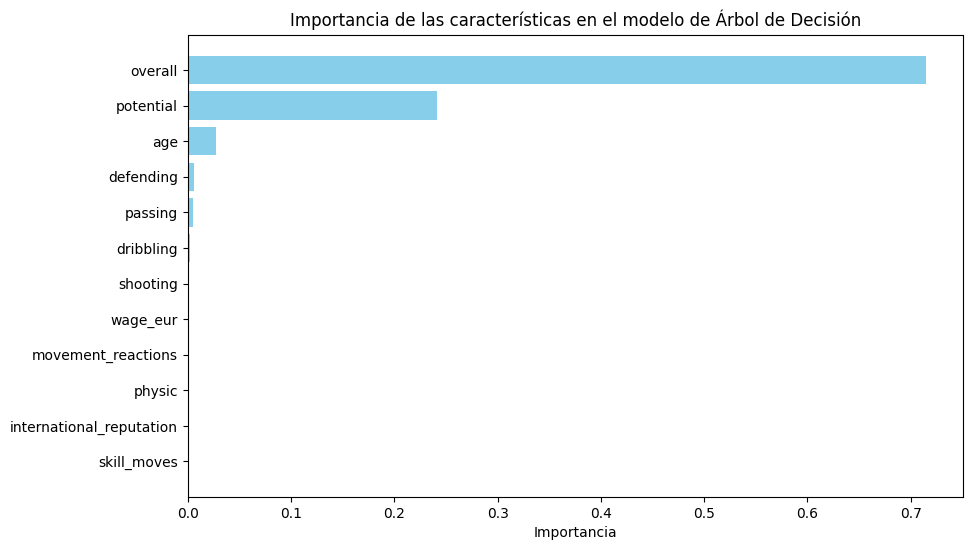

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Característica'], importancias_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las características en el modelo de Árbol de Decisión')
plt.gca().invert_yaxis()
plt.show()